In [416]:
# importing libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [417]:
def months(m):
    if (m=='Jan'):
        return 1
    if (m=='Feb'):
        return 2
    if (m=='Mar'):
        return 3
    if (m=='Apr'):
        return 4
    if (m=='May'):
        return 5
    if (m=='Jun'):
        return 6
    if (m=='Jul'):
        return 7
    if (m=='Aug'):
        return 8
    if (m=='Sep'):
        return 9
    if (m=='Oct'):
        return 10
    if (m=='Nov'):
        return 11
    if (m=='Dec'):
        return 12

In [418]:
import requests
from datetime import date
data = (requests.get(url = "https://api.covid19india.org/states_daily.json")).json()
#print (data)
data = data['states_daily']
cx = []
cy = []
rx = []
ry = []
dx = []
dy = []
for i in data:
    if (i['status']=='Confirmed'):
        din = i['date']
        day = int(din[0:2])
        month = int(months(din[3:6]))
        year = int('20'+din[7:9])
        f_date = date(2020, 3, 14)
        l_date = date(year, month, day)
        delta = l_date - f_date
        cx.append(delta.days)
        cy.append(i['dl'])
    elif (i['status']=='Recovered'):
        din = i['date']
        day = int(din[0:2])
        month = int(months(din[3:6]))
        year = int('20'+din[7:9])
        f_date = date(2020, 3, 14)
        l_date = date(year, month, day)
        delta = l_date - f_date
        rx.append(delta.days)
        ry.append(i['dl'])
    else:
        din = i['date']
        day = int(din[0:2])
        month = int(months(din[3:6]))
        year = int('20'+din[7:9])
        f_date = date(2020, 3, 14)
        l_date = date(year, month, day)
        delta = l_date - f_date
        dx.append(delta.days)
        dy.append(i['dl'])
print (len(cx))
print (len(cy))
print (len(rx))
print (len(ry))
print (len(dx))
print (len(dy))

183
183
183
183
183
183


In [419]:
cx = np.array(cx)
cy = np.array(cy)
cx = cx.astype('int64')
cy = cy.astype('int64')
print (cx.dtype)
print (cy.dtype)
print(cx)
print(cy)

int64
int64
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182]
[   7    0    0    1    2    4    6    7    0    3    0    5    1    4
    9   23   25   23   32  141   93   59   58   22   51   93   51  183
  166   85  356   51   17   62   67  186  110   78   75   92  128  138
  111  293  190  206  125   76 

In [420]:
#First we are plotting the data of confirmed cases in delhi

In [421]:
x = cx
y = cy

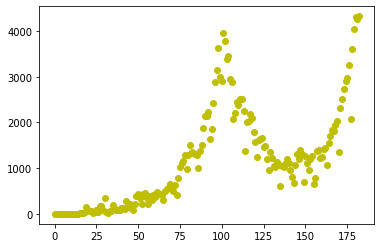

In [422]:
plt.scatter(cx,cy, color='y')
plt.show()

In [423]:
#defining hypothesis 
def hypothesis(theta, x):
    return theta[0] + theta[1]*x

In [424]:
#defining error function
def error(x,y,theta):
    m = x.shape[0]
    total_error = 0
    for i in range(m):
        total_error += (y[i] - hypothesis(theta,x[i]))**2
    return 0.5*total_error

In [425]:
# defining update rule 
def gradient(x,y,theta):
    grad = np.array([0.0,0.0])
    m = x.shape[0]
    for i in range(m):
        grad[0] += (hypothesis(theta,x[i]) - y[i])
        grad[1] += (hypothesis(theta,x[i]) - y[i])*x[i]
    return grad

In [426]:
#applying gradient_descent
def gradient_descent(x,y,learning_rate,maxIter):
    
    theta = np.array([0.0,0.0])
    err = []
    for i in range(maxIter):
        grad = gradient(x,y,theta)
        ce = error(x,y,theta)
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        err.append(ce)
        
    return theta,err

In [427]:
theta, err = gradient_descent(x,y,learning_rate=0.00000001,maxIter=10000)
print(theta[0], theta[1])

-0.3932437648064798 13.159378205986304


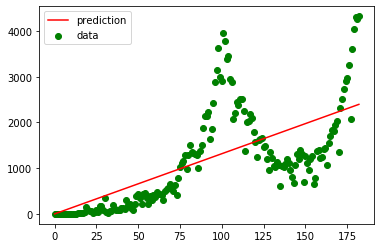

In [428]:
plt.scatter(x,y, color='g', label='data')
plt.plot(x,hypothesis(theta,x), color='r', label='prediction')
plt.legend()
plt.show()

In [429]:
#Second we are plotting the data of recovered cases in delhi

In [430]:
rx = np.array(rx)
ry = np.array(ry)
rx = rx.astype('int64')
ry = ry.astype('int64')
print (rx.dtype)
print (ry.dtype)
print(rx)
print(ry)

int64
int64
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182]
[   1    1    0    0    0    1    2    0    0    0    1    0    0    0
    0    0    0    0    0    2    0    8    0    0    4    1    4    2
    0    1    3    0   10   11   20  135   83  141  180  113   84   49
   12    8    0  201   14    2 

In [431]:
x = rx
y = ry

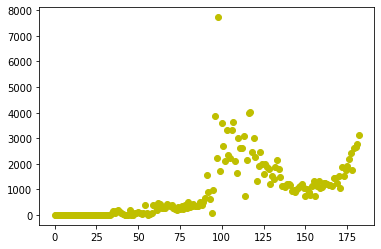

In [432]:
plt.scatter(x,y, color='y')
plt.show()

In [433]:
theta, err = gradient_descent(x,y,learning_rate=0.00000001,maxIter=10000)
print(theta[0], theta[1])

-0.7291102638039972 11.38749745805371


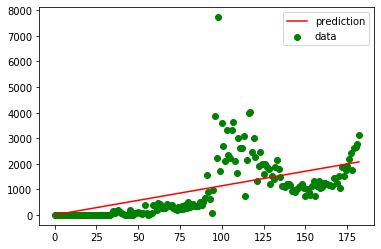

In [434]:
plt.scatter(x,y, color='g', label='data')
plt.plot(x,hypothesis(theta,x), color='r', label='prediction')
plt.legend()
plt.show()

In [435]:
#Second we are plotting the data of deceased cases in delhi

In [436]:
dx = np.array(dx)
dy = np.array(dy)
dx = dx.astype('int64')
dy = dy.astype('int64')
print (dx.dtype)
print (dy.dtype)
print(dx)
print(dy)

int64
int64
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182]
[  1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0
   0   2   2   0   1   0   2   0   3   2   5   5   4   2   2   6   4   1
   2   2   0   1   2   3   1   0   0   0   2   3   2   3   0   0   0   1
   1   2   0   5   0  13 

In [437]:
x = dx
y = dy

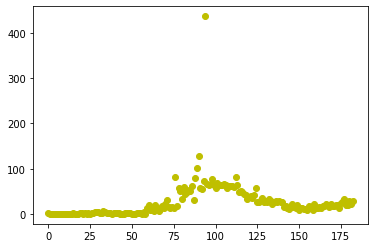

In [438]:
plt.scatter(x,y, color='y')
plt.show()

In [439]:
theta, err = gradient_descent(x,y,learning_rate=0.00000001,maxIter=10000)
print(theta[0], theta[1])

0.050042916113881494 0.2538530970257131


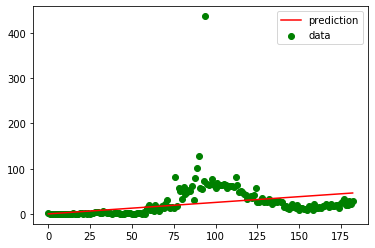

In [440]:
plt.scatter(x,y, color='g', label='data')
plt.plot(x,hypothesis(theta,x), color='r', label='prediction')
plt.legend()
plt.show()